<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>



<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; font-size:42px;  color:#2c3e50; letter-spacing:1px; margin:20px 0; padding-bottom:10px; border-bottom:3px solid #27ae60;">
🛒 Big Mart Sales Prediction
</h1>


## **About Dataset**                            
**[Dataset Available here](https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets)**\
Sales Prediction for Big Mart Outlets\
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Data Dictionary
We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.

Train file:
CSV containing the item outlet information with a sales value

### Variable Description:
1. Item_Identifier ---- Unique product ID
2. Item_Weight ---- Weight of product
3. Item_Fat_Content ---- Whether the product is low fat or not
4. Item_Visibility ---- The % of the total display area of all products in a store allocated to the particular product
5. Item_Type ---- The category to which the product belongs
6. Item_MRP ---- Maximum Retail Price (list price) of the product
7. Outlet_Identifier ---- Unique store ID
8. Outlet_Establishment_Year ---- The year in which the store was established
9. Outlet_Size ---- The size of the store in terms of ground area covered
10. Outlet_Location_Type ---- The type of city in which the store is located
11. *Outlet_Type ---- Whether the outlet is just a grocery store or some sort of supermarket
12. Item_Outlet_Sales ---- sales of the product in t particular store. This is the outcome variable to be predicted.

Test file:\
CSV containing item outlet combinations for which sales need to be forecasted

### Variable Description:
1. Item_Identifier ----- Unique product ID
2. Item_Weight ---- Weight of product
3. Item_Fat_Content ----- Whether the product is low fat or not
4. Item_Visibility ---- The % of the total display area of all products in a store allocated to the particular product
5. Item_Type ---- The category to which the product belongs
6. Item_MRP ----- Maximum Retail Price (list price) of the product
7. Outlet_Identifier ----- Unique store ID
8. Outlet_Establishment_Year ----- The year in which store store was established
9. Outlet_Size ----- The size of the store in terms of ground area covered
10. Outlet_Location_Type ---- The type of city in which the store is located
11. Outlet_Type ---- whether the outlet is just a grocery store or some sort of supermarket

Submission file format\
Variable Description\
Item_Identifier ----- Unique product ID\
Outlet_Identifier ----- Unique store ID\
Item_Outlet_Sales ----- Sales of the product in t particular store. This is the outcome variable to be predicted.

Evaluation Metric\
Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in the same sample submission.

We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the Root Mean Square Error value to judge your response.

In [142]:
# importing libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer

In [116]:
df=pd.read_csv('Test.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [117]:
df.shape

(5681, 11)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [119]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [120]:
df.isnull().sum()/df.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [121]:
# converting the columns name into lower
df.columns=df.columns.str.lower()
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [122]:
df['item_fat_content'].value_counts()

item_fat_content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [123]:
# converting item_fat_content column to equal
df['item_fat_content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
df['item_fat_content'].value_counts()

C:\Windows\Temp\ipykernel_8728\526952874.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['item_fat_content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)


item_fat_content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [124]:
# checking for the missing values
df.isnull().sum()

item_identifier                 0
item_weight                   976
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1606
outlet_location_type            0
outlet_type                     0
dtype: int64

In [125]:
# using knn imputer to impute the numeric missing value
imputer=KNNImputer(n_neighbors=5)
df[['item_weight']]=imputer.fit_transform(df[['item_weight']])
df.isnull().sum()

item_identifier                 0
item_weight                     0
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1606
outlet_location_type            0
outlet_type                     0
dtype: int64

In [126]:
# imputing the values for the missing values
df['outlet_size'].fillna(df['outlet_size'].mode()[0],inplace=True)
df.isnull().sum()

C:\Windows\Temp\ipykernel_8728\1820246748.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['outlet_size'].fillna(df['outlet_size'].mode()[0],inplace=True)


item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
dtype: int64

In [127]:
df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type'],
      dtype='object')

In [128]:
catego_le=['item_fat_content','outlet_location_type','outlet_type']
cate_ordi=['outlet_size']
categorical_ohe=['item_identifier','item_type','outlet_identifier',]
for col in catego_le:
    print(df[col].value_counts())
    print("=========================")

item_fat_content
Low Fat    3668
Regular    2013
Name: count, dtype: int64
outlet_location_type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: count, dtype: int64
outlet_type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64


In [129]:
# encoding the lable encoder values
le=LabelEncoder()
for col in catego_le:
    df[col]=le.fit_transform(df[col])
df.head()


,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,0,1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,Medium,1,1
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,Medium,2,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,1,1
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,Medium,2,3


In [130]:
# encoding the values with the ordinal encoder
oe=OrdinalEncoder()
df[cate_ordi]=oe.fit_transform(df[cate_ordi])
df.outlet_size.value_counts()

outlet_size
1.0    3468
2.0    1592
0.0     621
Name: count, dtype: int64

In [131]:
# encoding the values with the one hot encoder
ohe=OneHotEncoder(sparse_output=False)
# Fit and transform
encoded = ohe.fit_transform(df[categorical_ohe])

# Create DataFrame with encoded columns and proper names
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorical_ohe), index=df.index)

# Drop original categorical columns and concat encoded columns
df = pd.concat([df.drop(columns=categorical_ohe), encoded_df], axis=1)

print(df.head())

   item_weight  item_fat_content  item_visibility  item_mrp  \
0    20.750000                 0         0.007565  107.8622   
1     8.300000                 1         0.038428   87.3198   
2    14.600000                 0         0.099575  241.7538   
3     7.315000                 0         0.015388  155.0340   
4    12.695633                 1         0.118599  234.2300   

   outlet_establishment_year  outlet_size  outlet_location_type  outlet_type  \
0                       1999          1.0                     0            1   
1                       2007          1.0                     1            1   
2                       1998          1.0                     2            0   
3                       2007          1.0                     1            1   
4                       1985          1.0                     2            3   

   item_identifier_DRA12  item_identifier_DRA24  ...  \
0                    0.0                    0.0  ...   
1                    0.0    

In [132]:
df.head()

,item_weight,item_fat_content,item_visibility,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_identifier_DRA12,item_identifier_DRA24,...,outlet_identifier_OUT010,outlet_identifier_OUT013,outlet_identifier_OUT017,outlet_identifier_OUT018,outlet_identifier_OUT019,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049
0,20.750000,0,0.007565,107.8622,1999,1.0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8.300000,1,0.038428,87.3198,2007,1.0,1,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.600000,0,0.099575,241.7538,1998,1.0,2,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.315000,0,0.015388,155.0340,2007,1.0,1,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.695633,1,0.118599,234.2300,1985,1.0,2,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


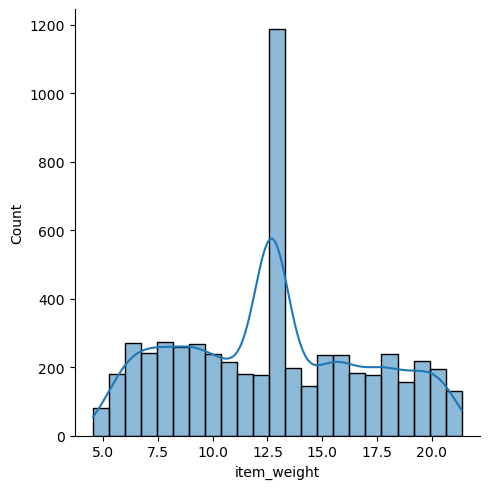

In [133]:
# making displot on item weight
sns.displot(df['item_weight'],kde=True)
plt.show()

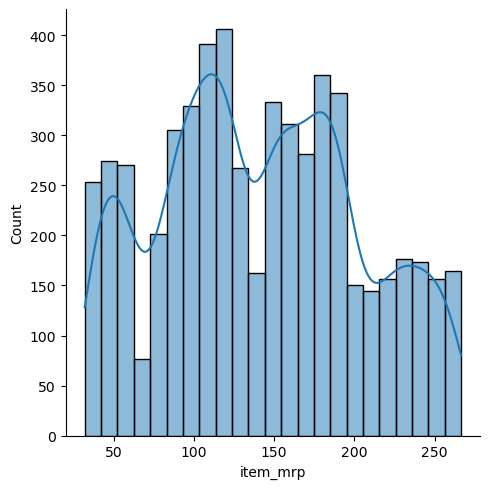

In [134]:
# making displot on item mrp
sns.displot(df['item_mrp'],kde=True)
plt.show()

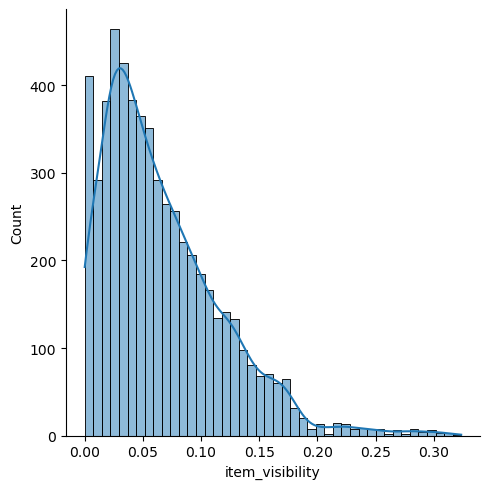

In [135]:
# making displot on item visibility
sns.displot(df['item_visibility'],kde=True)
plt.show()

In [140]:
# seperating the data into x and y
X=df.drop(columns='outlet_size',axis=1)
Y=df['outlet_size']
print(X)
print(Y)

      item_weight  item_fat_content  item_visibility  item_mrp  \
0       20.750000                 0         0.007565  107.8622   
1        8.300000                 1         0.038428   87.3198   
2       14.600000                 0         0.099575  241.7538   
3        7.315000                 0         0.015388  155.0340   
4       12.695633                 1         0.118599  234.2300   
...           ...               ...              ...       ...   
5676    10.500000                 1         0.013496  141.3154   
5677     7.600000                 1         0.142991  169.1448   
5678    10.000000                 0         0.073529  118.7440   
5679    15.300000                 1         0.000000  214.6218   
5680     9.500000                 1         0.104720   79.7960   

      outlet_establishment_year  outlet_location_type  outlet_type  \
0                          1999                     0            1   
1                          2007                     1            1 

In [141]:
# training the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4544, 1576)
(1137, 1576)
(4544,)
(1137,)


In [143]:
xgb=XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [144]:
# model evaluation
y_pred=xgb.predict(X_test)
print(y_pred)
print(Y_test)
print(xgb.score(X_test,Y_test))

[1.0000101 1.0000101 1.9999632 ... 1.0000101 1.9999632 1.0000101]
3746    1.0
4342    1.0
3682    2.0
3944    1.0
1660    2.0
       ... 
4239    1.0
5346    2.0
739     1.0
3475    2.0
4068    1.0
Name: outlet_size, Length: 1137, dtype: float64
0.9999999983214976
